# Import and Review Raw Data for Correlations

In [4]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

In [7]:
#Import module and connect to SQL database in ElephantSQL
import psycopg2

conn = psycopg2.connect(database="tykbmuyn",
                        host="kashin.db.elephantsql.com",
                        user="tykbmuyn",
                        password="tWS_mbAfmEAWeCLB7WEnDgIDmX9d123W",
                        port="5432")

In [8]:
#Generate cursor object to execute any queries on the database and retrieve data
cursor = conn.cursor()

In [30]:
#Query complete_ca_data table in DB
cursor.execute("SELECT * FROM complete_ca_data")

In [31]:
#Use fecthall command to print query results from above
data_list = cursor.fetchall()
data_list

[(2003, 'CA', 35253.159, 6.9, 49300.0, 50.75, 190.4, 371522.2),
 (2003, 'Los Angeles', 9781.839, 7.0, 41544.0, 45.75, 187.0, 339254.6),
 (2003, 'Riverside', 1764.303, 6.6, 44598.0, 53.25, 73.0, 253031.2),
 (2003, 'San Diego', 2907.988, 5.3, 48766.0, 38.5, 205.3, 422234.1),
 (2003, 'San Francisco', 775.663, 6.8, 51402.0, 44.5, 196.4, 634916.1),
 (2004, 'CA', 35574.576, 6.2, 49222.0, 42.5, 195.4, 451067.5),
 (2004, 'Los Angeles', 9808.353, 6.5, 43518.0, 35.5, 193.2, 425767.9),
 (2004, 'Riverside', 1845.608, 6.0, 46885.0, 39.5, 74.9, 341540.3),
 (2004, 'San Diego', 2922.175, 4.7, 51939.0, 26.25, 212.8, 546521.8),
 (2004, 'San Francisco', 773.556, 5.8, 51815.0, 37.25, 198.8, 711365.8),
 (2005, 'CA', 35827.943, 5.4, 51755.0, 33.5, 202.6, 525960.0),
 (2005, 'Los Angeles', 9802.296, 5.3, 48166.0, 25.0, 201.8, 506770.0),
 (2005, 'Riverside', 1917.246, 5.3, 52029.0, 37.5, 77.7, 399167.1),
 (2005, 'San Diego', 2927.956, 4.3, 56224.0, 22.75, 220.6, 602768.3),
 (2005, 'San Francisco', 777.835, 5.0

In [35]:
# convert database list object to DataFrame
data = pd.DataFrame(data_list, columns = ['Year','County','Population_Size','Unemployment_Rate','Median_Household_Income','First_Time_Buyer_Rate','CPI','Median_House_Price'])
data.head()

,Year,County,Population_Size,Unemployment_Rate,Median_Household_Income,First_Time_Buyer_Rate,CPI,Median_House_Price
0,2003,CA,35253.159,6.9,49300.0,50.75,190.4,371522.2
1,2003,Los Angeles,9781.839,7.0,41544.0,45.75,187.0,339254.6
2,2003,Riverside,1764.303,6.6,44598.0,53.25,73.0,253031.2
3,2003,San Diego,2907.988,5.3,48766.0,38.50,205.3,422234.1
4,2003,San Francisco,775.663,6.8,51402.0,44.50,196.4,634916.1


                             Year  Population_Size  Unemployment_Rate  \
Year                     1.000000         0.027377          -0.055115   
Population_Size          0.027377         1.000000           0.117741   
Unemployment_Rate       -0.055115         0.117741           1.000000   
Median_Household_Income  0.709938        -0.182328          -0.345959   
First_Time_Buyer_Rate    0.140659         0.154096           0.743848   
CPI                      0.393200         0.238986          -0.212839   
Median_House_Price       0.359399        -0.229745          -0.504221   

                         Median_Household_Income  First_Time_Buyer_Rate  \
Year                                    0.709938               0.140659   
Population_Size                        -0.182328               0.154096   
Unemployment_Rate                      -0.345959               0.743848   
Median_Household_Income                 1.000000              -0.364952   
First_Time_Buyer_Rate                  -

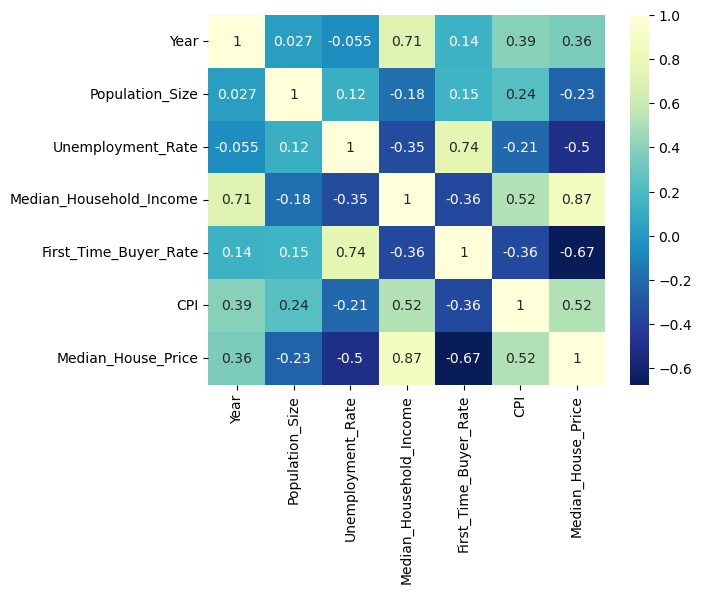

In [36]:
#Use Correlation Heatmap from Seaborn to determine which values have the greatest positive correlation 
#to median house price
#by geographical area

#prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu_r", annot=True)
  
# displaying heatmap
plt.show()

In [37]:
new_data = data.loc[data['County'] != 'CA']
new_data

,Year,County,Population_Size,Unemployment_Rate,Median_Household_Income,First_Time_Buyer_Rate,CPI,Median_House_Price
1,2003,Los Angeles,9781.839,7.0,41544.0,45.75,187.0,339254.6
2,2003,Riverside,1764.303,6.6,44598.0,53.25,73.0,253031.2
3,2003,San Diego,2907.988,5.3,48766.0,38.50,205.3,422234.1
4,2003,San Francisco,775.663,6.8,51402.0,44.50,196.4,634916.1
6,2004,Los Angeles,9808.353,6.5,43518.0,35.50,193.2,425767.9
...,...,...,...,...,...,...,...,...
89,2020,San Francisco,870.014,8.0,121722.0,28.00,300.1,1646125.0
91,2021,Los Angeles,9829.544,8.9,77356.0,38.50,289.2,771858.3
92,2021,Riverside,2458.395,7.3,78690.0,51.75,114.0,557783.3
93,2021,San Diego,3286.069,6.5,90756.0,41.25,319.8,826297.5


In [38]:
#Review CA data details
new_data.describe()

,Year,Population_Size,Unemployment_Rate,Median_Household_Income,First_Time_Buyer_Rate,CPI,Median_House_Price
count,76.00000,76.000000,76.000000,76.000000,76.000000,76.000000,7.600000e+01
mean,2012.00000,4022.966013,6.900000,66507.684211,45.016447,207.953947,6.028603e+05
std,5.51362,3523.401621,2.913921,17961.371980,15.353031,73.372346,3.532147e+05
min,2003.00000,773.556000,2.200000,41544.000000,19.500000,73.000000,1.833514e+05
25%,2007.00000,1543.146250,4.700000,53963.000000,33.812500,168.750000,3.808348e+05
50%,2012.00000,2686.778500,6.100000,60771.500000,44.625000,227.800000,5.184229e+05
75%,2017.00000,4931.354250,8.950000,72960.500000,57.312500,259.025000,7.037514e+05
max,2021.00000,10094.865000,14.200000,121795.000000,80.750000,319.800000,1.810700e+06


In [39]:
#Check for Null Values
new_data.isnull().values.any()

False

In [40]:
#Import Anova Test
from scipy.stats import f_oneway
f_oneway(new_data.loc[new_data['County']=='Los Angeles','Median_House_Price'],new_data.loc[new_data['County']=='Riverside','Median_House_Price'],new_data.loc[new_data['County']=='San Francisco','Median_House_Price'],new_data.loc[new_data['County']=='San Diego','Median_House_Price'])

F_onewayResult(statistic=43.625972495078, pvalue=3.5205974933775545e-16)

<AxesSubplot:title={'center':'Median_House_Price'}, xlabel='County'>

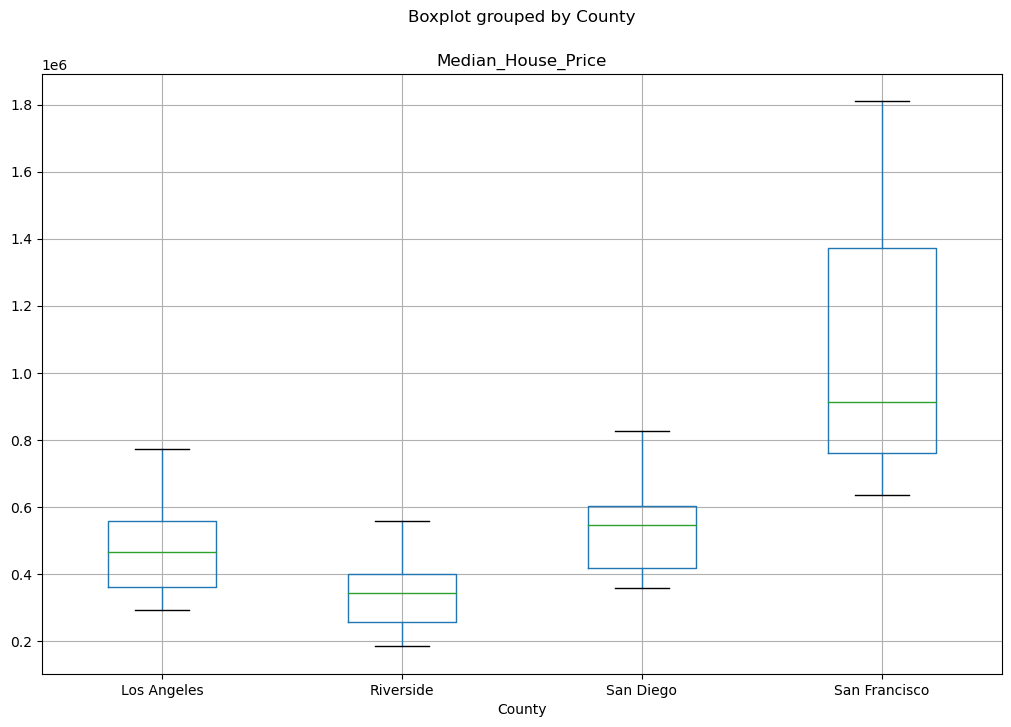

In [41]:
#Create a boxplot to confirm County impact on data
new_data.boxplot('Median_House_Price', by='County', figsize=(12, 8))

# ctrl = data['weight'][data.group == 'ctrl']

# grps = pd.unique(data.group.values)
# d_data = {grp:data['weight'][data.group == grp] for grp in grps}

# k = len(pd.unique(data.group))  # number of conditions
# N = len(data.values)  # conditions times participants
# n = data.groupby('group').size()[0] #Participants in each condition

In [42]:
#Encoding County Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_data_encoded = new_data.copy()
new_data_encoded['County'] = le.fit_transform(new_data_encoded['County'])
new_data_encoded.head()
new_data_encoded_2 = new_data_encoded.drop(columns = 'Year')
new_data_encoded_2.head()

,County,Population_Size,Unemployment_Rate,Median_Household_Income,First_Time_Buyer_Rate,CPI,Median_House_Price
1,0,9781.839,7.0,41544.0,45.75,187.0,339254.6
2,1,1764.303,6.6,44598.0,53.25,73.0,253031.2
3,2,2907.988,5.3,48766.0,38.50,205.3,422234.1
4,3,775.663,6.8,51402.0,44.50,196.4,634916.1
6,0,9808.353,6.5,43518.0,35.50,193.2,425767.9


# Begin Machine Learning

In [43]:
#Get X and Y targets
x = new_data_encoded_2[['County','Population_Size','Unemployment_Rate','Median_Household_Income','CPI', 'First_Time_Buyer_Rate']]

y = new_data_encoded_2[['Median_House_Price']]

In [44]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

#Initialize regressor
model = LinearRegression()

#Begin fitting the training sets
model.fit(X_train, y_train)

LinearRegression()

In [45]:
#Find the score R2-score for both training and test sets
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9581738216560869
Testing Score: 0.9621595118506646


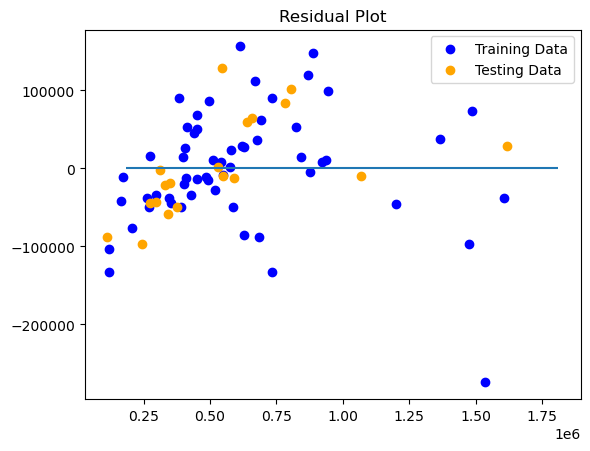

In [46]:
#Plot Residuals Graph
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [47]:
#Save model
import pickle
pickle.dump(model, open('model.pkl', 'wb'))